In [1]:
# importing dependencies
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

Average number of people in each coach after 100000 trials:
Coach 1: 11 people
Coach 2: 13 people
Coach 3: 13 people
Coach 4: 13 people
Coach 5: 13 people
Coach 6: 13 people
Coach 7: 13 people
Coach 8: 12 people


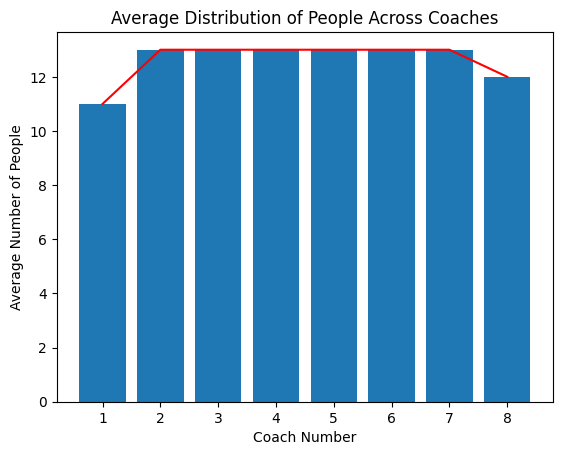

Sum of averages: 100.0
Sum of rounded: 101.0


In [2]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt

# assumptions
coaches = 8
people = 100
entry_points = np.array([3, 6])
trials = 100_000
α = 1.0
β = 1.2
women_ratio = 0.3

@njit
def onetrain(people, women_ratio, coaches, entry_points, α, β):
    crowd = np.zeros(coaches, dtype=np.int32)
    for _ in range(people):
        iswomen = np.random.rand()
        if iswomen < women_ratio:
            startcoach = 1
        else:
            startcoach = 2

        n_available = coaches - startcoach + 1
        ep_idx = np.random.randint(0, len(entry_points))
        entry_point = entry_points[ep_idx]

        costs = np.empty(n_available)
        for j in range(n_available):
            coach = startcoach + j
            distance = abs(coach - entry_point)
            load = crowd[coach - 1]
            costs[j] = α * distance + β * load

        min_cost = np.min(costs)
        min_idx = np.where(costs == min_cost)[0]
        chosen_offset = min_idx[np.random.randint(0, len(min_idx))]
        chosen_idx = startcoach + chosen_offset
        crowd[chosen_idx - 1] += 1

    return crowd

def montecarlo(runs=trials):
    total_crowd = np.zeros(coaches, dtype=np.int32)
    for _ in range(runs):
        crowd = onetrain(people, women_ratio, coaches, entry_points, α, β)
        total_crowd += crowd
    avg_crowd = total_crowd / runs
    return avg_crowd

if __name__ == "__main__":
    simulation = montecarlo()
    print(f"Average number of people in each coach after {trials} trials:")
    for i in range(coaches):
        print(f"Coach {i+1}: {round(simulation[i])} people")

    rounded = np.round(simulation, 0)
    plt.bar(range(1, coaches + 1), rounded)
    plt.plot(range(1, coaches + 1), rounded, color='red')
    plt.xlabel('Coach Number')
    plt.ylabel('Average Number of People')
    plt.title('Average Distribution of People Across Coaches')
    plt.show()

    print("Sum of averages:", simulation.sum())
    print("Sum of rounded:", rounded.sum())
